Step 1: Create 150 Rows Dataset (CSV file)

We can create synthetic student dataset with random numbers using Python.

Each student will have:

ID, Name, Maths, Science, English, Attendance (%)

# We’ll save as student_analysis_dataset.csv.

In [73]:

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Random seed (same result every time)
np.random.seed(42)

# Number of students
n = 150

# Generate random data
data = {
    "ID": range(1, n+1),
    "Name": [f"Student_{i}" for i in range(1, n+1)],
    "Maths": np.random.randint(30, 100, size=n),
    "Science": np.random.randint(30, 100, size=n),
    "English": np.random.randint(30, 100, size=n),
    "Attendance": np.random.randint(60, 100, size=n)
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 3: Calculate Average and Total
df["Average"] = df[["Maths","Science","English"]].mean(axis=1)
df["Total"] = df["Maths"] + df["Science"] + df["English"]

# Step 4: Pass/Fail Logic (Average >=50 AND Attendance >=75)
df["Result"] = np.where((df["Average"] >= 50) & (df["Attendance"] >= 75), 1, 0)

# Step 5: Reorder columns
df = df[["ID", "Name", "Maths", "Science", "English", "Attendance", "Average", "Total", "Result"]]

# Save dataset
df.to_csv("student_analysis_dataset_with_total.csv", index=False)
print("✅ Dataset created successfully!\n")
print(df.head())

✅ Dataset created successfully!

   ID       Name  Maths  Science  English  Attendance    Average  Total  \
0   1  Student_1     81       68       86          64  78.333333    235   
1   2  Student_2     44       31       65          94  46.666667    140   
2   3  Student_3     90       32       74          71  65.333333    196   
3   4  Student_4     50       85       49          84  61.333333    184   
4   5  Student_5     53       88       94          80  78.333333    235   

   Result  
0       0  
1       0  
2       0  
3       1  
4       1  


# Basic Pandas operations

In [74]:
# =============================
# STEP 2: DATA EXPLORATION
# =============================

# Shape of dataset
print("Rows, Columns:", df.shape)

# Column names
print(df.columns)

# Check missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


Rows, Columns: (150, 9)
Index(['ID', 'Name', 'Maths', 'Science', 'English', 'Attendance', 'Average',
       'Total', 'Result'],
      dtype='object')
ID            0
Name          0
Maths         0
Science       0
English       0
Attendance    0
Average       0
Total         0
Result        0
dtype: int64
               ID       Maths     Science     English  Attendance     Average  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean    75.500000   63.773333   63.966667   65.266667   79.493333   64.335556   
std     43.445368   20.816922   20.241302   20.946293   11.636408   13.196869   
min      1.000000   30.000000   30.000000   30.000000   60.000000   30.666667   
25%     38.250000   44.000000   48.000000   45.250000   69.000000   55.000000   
50%     75.500000   64.000000   62.000000   63.500000   79.500000   64.333333   
75%    112.750000   82.000000   81.750000   86.000000   89.750000   73.916667   
max    150.000000   99.000000   99.000000   9

In [75]:
import numpy as np

# Mean, Std, Variance of Maths
print("Maths mean:", np.mean(df["Maths"]))
print("Maths std:", np.std(df["Maths"]))
print("Maths variance:", np.var(df["Maths"]))


Maths mean: 63.77333333333333
Maths std: 20.747416438894
Maths variance: 430.45528888888896


In [76]:
import numpy as np

# Mean, Std, Variance of Science
print("Science mean:", np.mean(df["Science"]))
print("Science std:", np.std(df["Science"]))
print("Science variance:", np.var(df["Science"]))


Science mean: 63.96666666666667
Science std: 20.173717775583384
Science variance: 406.978888888889


Step 2: Load Dataset & Explore

In [77]:
# Load dataset
df = pd.read_csv("student_analysis_dataset_with_total.csv")

# Show first 5 rows
df.head()


,ID,Name,Maths,Science,English,Attendance,Average,Total,Result
0,1,Student_1,81,68,86,64,78.333333,235,0
1,2,Student_2,44,31,65,94,46.666667,140,0
2,3,Student_3,90,32,74,71,65.333333,196,0
3,4,Student_4,50,85,49,84,61.333333,184,1
4,5,Student_5,53,88,94,80,78.333333,235,1


In [78]:
# Step 6: Check pass/fail count
pass_count = df[df["Result"] == 1].shape[0]
fail_count = df[df["Result"] == 0].shape[0]
print(f"\n🎓 Pass Students: {pass_count}")
print(f"❌ Fail Students: {fail_count}\n")


🎓 Pass Students: 81
❌ Fail Students: 69



#Step 7: Visualizations

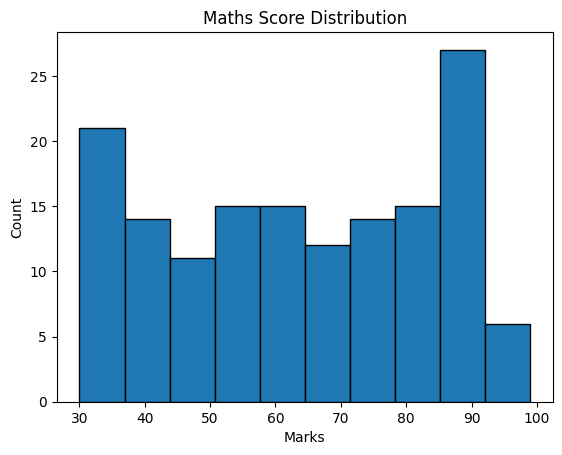

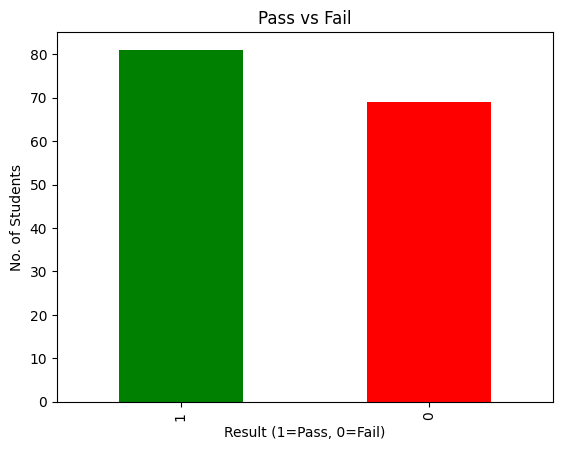

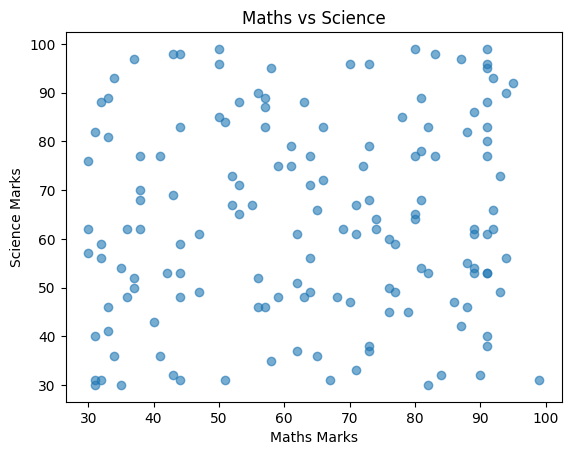

In [79]:

plt.hist(df["Maths"], bins=10, edgecolor="black")
plt.title("Maths Score Distribution")
plt.xlabel("Marks")
plt.ylabel("Count")
plt.show()

df["Result"].value_counts().plot(kind="bar", color=["green","red"])
plt.title("Pass vs Fail")
plt.xlabel("Result (1=Pass, 0=Fail)")
plt.ylabel("No. of Students")
plt.show()

plt.scatter(df["Maths"], df["Science"], alpha=0.6)
plt.title("Maths vs Science")
plt.xlabel("Maths Marks")
plt.ylabel("Science Marks")
plt.show()

Step 4: Machine Learning Basics

LINEAR REGRESSION (Predict Total Marks)

In [80]:
# =============================
# STEP 4: LINEAR REGRESSION
# =============================

from sklearn.linear_model import LinearRegression

# Features: Maths, Science, English, Attendance
X = df[["Maths","Science","English","Attendance"]]

# Target: Total marks
y = df["Total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
new_student = pd.DataFrame({
    "Maths": [80],
    "Science": [75],
    "English": [70],
    "Attendance": [65]  # still included, model can learn effect
})

pred_total = lin_reg.predict(new_student)[0]
print("📊 Predicted Total Marks for new student:", round(pred_total,2))


📊 Predicted Total Marks for new student: 225.0


STEP 5 — LOGISTIC REGRESSION (Predict Pass/Fail)

In [81]:
# =============================
# STEP 5: LOGISTIC REGRESSION
# =============================

# Step 8: Logistic Regression
X = df[["Maths","Science","English","Attendance"]]
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("📊 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


📊 Logistic Regression Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.84      0.89      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



STEP 6 — DECISION TREE CLASSIFIER

🌳 Decision Tree Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        18

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



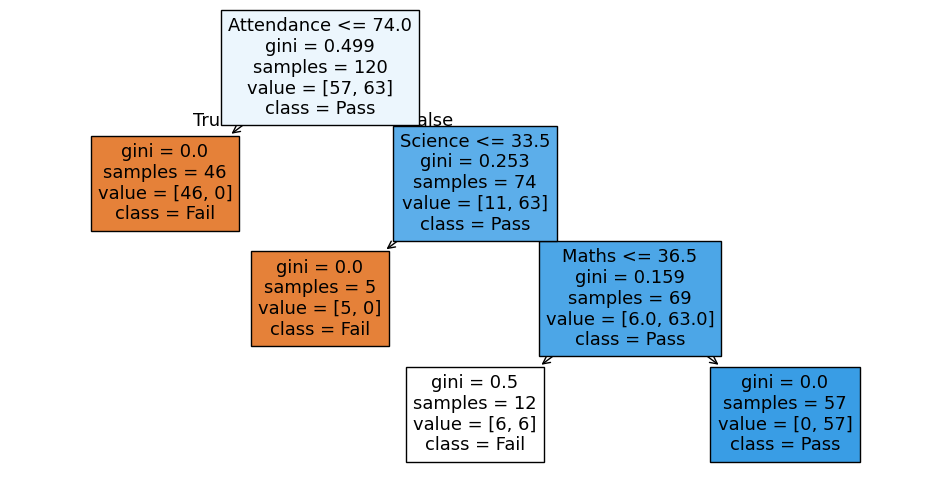

In [83]:
# Step 9: Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("🌳 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=["Fail","Pass"], filled=True)
plt.show()


STEP 7 — FEATURE IMPORTANCE (Which subject matters most?)

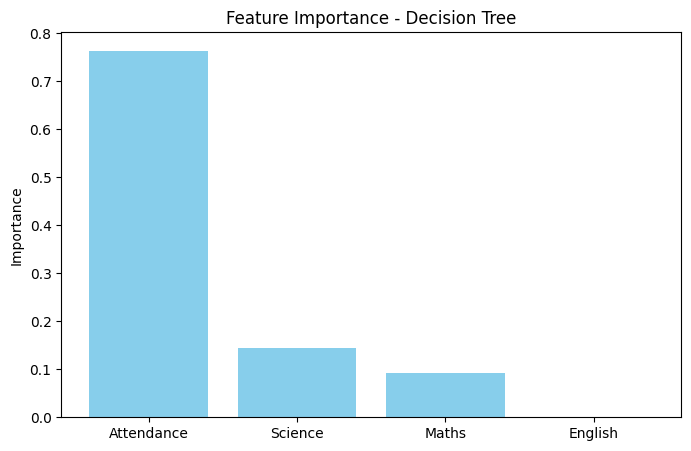

In [84]:
# Step 10: Feature Importance
importance = pd.DataFrame({"Feature": X.columns, "Importance": dt.feature_importances_}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8,5))
plt.bar(importance["Feature"], importance["Importance"], color='skyblue')
plt.title("Feature Importance - Decision Tree")
plt.ylabel("Importance")
plt.show()



In [86]:
# Step 12: Predict for new student
new_student = pd.DataFrame({
    "Maths": [80],
    "Science": [75],
    "English": [70],
    "Attendance": [69]  # very low attendance
})

# Calculate total & average for new student
new_student["Total"] = new_student["Maths"] + new_student["Science"] + new_student["English"]
new_student["Average"] = new_student[["Maths","Science","English"]].mean(axis=1)

# Predict result
pred_result = log_reg.predict(new_student[["Maths","Science","English","Attendance"]])[0]
new_student["Result"] = pred_result

# Map 1=Pass, 0=Fail for readability
new_student["Result"] = new_student["Result"].map({1:"Pass",0:"Fail"})

print("\n🎓 New Student Prediction:")
print(new_student[["Maths","Science","English","Total","Average","Attendance","Result"]])


🎓 New Student Prediction:
   Maths  Science  English  Total  Average  Attendance Result
0     80       75       70    225     75.0          69   Fail


| Model               | Task                | Accuracy | Example Output          |
| ------------------- | ------------------- | -------- | ----------------------- |
| Linear Regression   | Predict Total Marks | —        | Predicted Total ≈ 224.6 |
| Logistic Regression | Predict Pass/Fail   | 0.83     | Pass or Fail            |
| Decision Tree       | Predict Pass/Fail   | 0.86     | Tree structure visible  |
